## Kidney Disease abstracts pulled from PubMed and PLOS sources and the NCBI GEO 

sample derivation summaries are analyzed in this python 3.6 script to predict the source of the abstract as either GEO, PLOS, or PubMed on Kidney Disease

In [1]:
%matplotlib inline 
import pandas as pd 
import matplotlib.pyplot as plt 
from textblob import TextBlob 
import numpy as np 
from sklearn.feature_extraction.text import CountVectorizer 
from sklearn.naive_bayes import MultinomialNB 
from sklearn.metrics import classification_report, f1_score, accuracy_score, confusion_matrix 
 
np.random.seed(507) 
 


In [7]:
reviews = pd.read_csv('NIH_PLOS_articles_kidney_disease.csv', header=None, na_values='NaN',encoding = 'unicode_escape') 
#the encoding needed for python3 handling nonASCII chars


In [8]:
reviews


,0,1
0,Sample GSM4200015 \t\tQuery DataSets for GSM42...,GEO
1,Sample GSM4200016 \t\tQuery DataSets for GSM42...,GEO
2,Sample GSM4200017 \t\tQuery DataSets for GSM42...,GEO
3,Sample GSM4200018 \t\tQuery DataSets for GSM42...,GEO
4,Sample GSM4200019 \t\tQuery DataSets for GSM42...,GEO
...,...,...
115,NaN,NaN
116,NaN,NaN
117,NaN,NaN
118,NaN,NaN


In [12]:
reviews = reviews.dropna()

In [13]:
reviews.shape

(43, 2)

In [14]:
reviews.columns = ['abstract','source']

In [15]:
reviews = reviews.reindex(np.random.permutation(reviews.index))

print(reviews)

                                             abstract  source
27  Serum bicarbonate concentrations and kidney di...  PubMed
17  The kidney injury caused by the onset of acute...  PubMed
3   Sample GSM4200018 \t\tQuery DataSets for GSM42...     GEO
42  Vascular endothelial growth factor A (VEGF-A) ...    PLOS
13  Sample GSM4200028 \t\tQuery DataSets for GSM42...     GEO
18  Micro RNA-30b (inhibitor) nanoparticles suppre...  PubMed
22  Combined exposure to lead, cadmium, mercury, a...  PubMed
35  Decrease in Irisin in Patients with Chronic Ki...    PLOS
29  Body mass index and early kidney function decl...  PubMed
37  The extent of scarring or renal interstitial c...    PLOS
5   Sample GSM4200020 \t\tQuery DataSets for GSM42...     GEO
2   Sample GSM4200017 \t\tQuery DataSets for GSM42...     GEO
36  In autosomal dominant polycystic kidney diseas...    PLOS
19  Association of plasma and urine metals levels ...  PubMed
14  Sample GSM4200029 \t\tQuery DataSets for GSM42...     GEO
31  The 

In [16]:


reviews['length'] = reviews['abstract'].map(lambda text: len(text))
print(reviews.head())



                                             abstract  source  length
27  Serum bicarbonate concentrations and kidney di...  PubMed    4926
17  The kidney injury caused by the onset of acute...  PubMed    3386
3   Sample GSM4200018 \t\tQuery DataSets for GSM42...     GEO    2879
42  Vascular endothelial growth factor A (VEGF-A) ...    PLOS    1404
13  Sample GSM4200028 \t\tQuery DataSets for GSM42...     GEO    2888


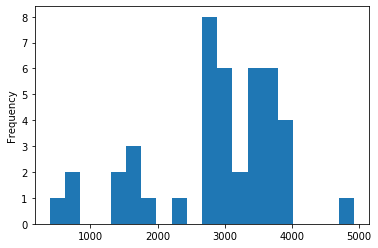

In [17]:
reviews.length.plot(bins=20, kind='hist') 

In [18]:
reviews.length.describe()

count      43.000000
mean     2893.279070
std       978.819243
min       394.000000
25%      2873.000000
50%      2894.000000
75%      3566.500000
max      4926.000000
Name: length, dtype: float64

In [19]:
print(list(reviews.abstract[reviews.length > 3700].index)) #near the max for length of LemmatizedTweets
print(list(reviews.source[reviews.length > 3700]))


[27, 22, 19, 28, 33, 21, 16, 25]
['PubMed', 'PubMed', 'PubMed', 'PubMed', 'PubMed', 'PubMed', 'PubMed', 'PubMed']


Wall time: 303 ms


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000196B0E13320>,
      dtype=object)

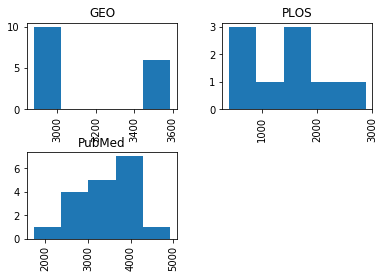

In [20]:
%%time
reviews.hist(column='length', by='source', bins=5)

In [21]:
def split_into_tokens(review):
    
    #review = unicode(review, 'iso-8859-1')# in python 3 the default of str() previously python2 as unicode() is utf-8
    return TextBlob(review).words

In [22]:


reviews.abstract.head().apply(split_into_tokens)



27    [Serum, bicarbonate, concentrations, and, kidn...
17    [The, kidney, injury, caused, by, the, onset, ...
3     [Sample, GSM4200018, Query, DataSets, for, GSM...
42    [Vascular, endothelial, growth, factor, A, VEG...
13    [Sample, GSM4200028, Query, DataSets, for, GSM...
Name: abstract, dtype: object

In [23]:
TextBlob("hello world, how is it going?").tags

[('hello', 'JJ'),
 ('world', 'NN'),
 ('how', 'WRB'),
 ('is', 'VBZ'),
 ('it', 'PRP'),
 ('going', 'VBG')]

In [24]:


import nltk
nltk.download('stopwords')



[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\m\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [25]:
from nltk.corpus import stopwords

stop = stopwords.words('english')
stop = stop + [u'a',u'b',u'c',u'd',u'e',u'f',u'g',u'h',u'i',u'j',u'k',u'l',u'm',u'n',u'o',u'p',u'q',u'r',u's',u't',u'v',u'w',u'x',u'y',u'z']

In [26]:
def split_into_lemmas(review):
    #review = unicode(review, 'iso-8859-1')
    review = review.lower()
    #review = unicode(review, 'utf8').lower()
    #review = str(review).lower()
    words = TextBlob(review).words
    # for each word, take its "base form" = lemma 
    return [word.lemma for word in words if word not in stop]

reviews.abstract.head().apply(split_into_lemmas)

27    [serum, bicarbonate, concentration, kidney, di...
17    [kidney, injury, caused, onset, acute, graft-v...
3     [sample, gsm4200018, query, datasets, gsm42000...
42    [vascular, endothelial, growth, factor, vegf-a...
13    [sample, gsm4200028, query, datasets, gsm42000...
Name: abstract, dtype: object

In [27]:
%%time
# bag of words on the comments
bow_transformer = CountVectorizer(analyzer=split_into_lemmas).fit(reviews['abstract'])
print(len(bow_transformer.vocabulary_))


2265
Wall time: 906 ms


In [28]:
review4 = reviews['abstract'][4]
print(review4)

Sample GSM4200019 		Query DataSets for GSM4200019
Status 	Public on Dec 03, 2019
Title 	AK86p1Adh
Sample type 	SRA
  	
Source name 	Human Adult kidney
Organism 	Homo sapiens
Characteristics 	tissue: Kidney
patients status: Healthy
culture conditions: Adherent
Treatment protocol 	nSPH formation: hKEpC were thawed and grown as 2D monolayers for 5-7 days. Upon reaching confluency of 80-100%, the cells were harvested and seeded on poly (2-hydroxyethylmethacrylate) (poly-HEMA; Sigma-Aldrich)-precoated plates, in serum free medium (SFM), at a concentration of 5.5?13x104 cells/mL. SFM was comprised of N2 medium (Biological Industries) supplemented with 1% Pen-strep 100M, 1% L-glutamine, 0.4% B27 supplement (Gibco), 4æg/ml heparin sodium (Intramed), 1% non-essential amino acids, 1% sodium pyruvate, 0.2% CD Lipid concentrate (all purchased from Invitrogen), 2.4mg/ml glucose, 0.4mg/ml transferrin, 10mg/ml insulin, 38.66æg/ml putrescine, 0.04% sodium selenite, 12.6æg/ml progesterone (all from Sig

In [29]:
bow4 = bow_transformer.transform([review4])


In [30]:
%%time
reviews_bow = bow_transformer.transform(reviews['abstract'])
print('sparse matrix shape:', reviews_bow.shape)
print('number of non-zeros:', reviews_bow.nnz)
print('sparsity: %.2f%%' % (100.0 * reviews_bow.nnz / (reviews_bow.shape[0] * reviews_bow.shape[1])))

sparse matrix shape: (43, 2265)
number of non-zeros: 7310
sparsity: 7.51%
Wall time: 766 ms


In [34]:

#reviews was permutated earlier, so taking the order is random
# Split/splice into training ~ 80% and testing ~ 20%
reviews_bow_train = reviews_bow[:34]
reviews_bow_test = reviews_bow[34:]
reviews_sentiment_train = reviews['source'][:34]
reviews_sentiment_test = reviews['source'][34:]

print(reviews_bow_train.shape)
print(reviews_bow_test.shape)



(34, 2265)
(9, 2265)


In [35]:
reviews_sentiment_test.unique()

array(['PubMed', 'GEO', 'PLOS'], dtype=object)

In [36]:


%time 
review_sentiment = MultinomialNB().fit(reviews_bow_train, reviews_sentiment_train)



Wall time: 0 ns


In [38]:

print('predicted:', review_sentiment.predict(bow4)[0])
print('expected:', reviews.source[4])



predicted: GEO
expected: GEO


In [39]:


predictions = review_sentiment.predict(reviews_bow_test)
print(predictions)



['PubMed' 'GEO' 'PubMed' 'PLOS' 'PubMed' 'GEO' 'GEO' 'PLOS' 'GEO']


In [41]:
print('accuracy', accuracy_score(reviews_sentiment_test, predictions))
print('confusion matrix\n', confusion_matrix(reviews_sentiment_test, predictions))
print('(row=expected, col=predicted)')
print('Results alphabetized as GEO, PLOS, then PubMed for source results predicted and expected')

accuracy 1.0
confusion matrix
 [[4 0 0]
 [0 2 0]
 [0 0 3]]
(row=expected, col=predicted)
Results alphabetized as GEO, PLOS, then PubMed for source results predicted and expected


In [42]:
print(classification_report(reviews_sentiment_test, predictions))
#The F1 score can be interpreted as a weighted average of the precision and recall, 
#where an F1 score reaches its best value at 1 and worst score at 0.

              precision    recall  f1-score   support

         GEO       1.00      1.00      1.00         4
        PLOS       1.00      1.00      1.00         2
      PubMed       1.00      1.00      1.00         3

    accuracy                           1.00         9
   macro avg       1.00      1.00      1.00         9
weighted avg       1.00      1.00      1.00         9



In [43]:
def predict_review(new_review): 
    new_sample = bow_transformer.transform([new_review])
    print(new_review, np.around(review_sentiment.predict_proba(new_sample), decimals=2), 
          '\n')

### Values returned alphabatized for Type: no, yes are values returned in the array order

In [47]:
print('Results alphabetized as GEO, PLOS, then PubMed for source results predicted being the highest probability:\n')
predict_review('in vivo. cell culture. growth.')

predict_review('radiating pain.')

predict_review('quality of life.')
predict_review('I don\'t like spaghetti.')

predict_review('samples derived. university research.')

Results alphabetized as GEO, PLOS, then PubMed for source results predicted being the highest probability:

in vivo. cell culture. growth. [[1. 0. 0.]] 

radiating pain. [[0.24 0.27 0.49]] 

quality of life. [[0.19 0.22 0.59]] 

I don't like spaghetti. [[0.35 0.21 0.44]] 

samples derived. university research. [[0.01 0.05 0.94]] 



In [48]:
reviews.groupby('source').describe()

length                                                            \
        count         mean         std     min     25%     50%      75%   
source                                                                    
GEO      16.0  3140.125000  342.826462  2876.0  2879.0  2888.0  3557.00   
PLOS      9.0  1408.111111  753.929944   394.0   801.0  1404.0  1656.00   
PubMed   18.0  3416.444444  693.514004  1726.0  3060.5  3408.5  3811.75   

                
           max  
source          
GEO     3587.0  
PLOS    2886.0  
PubMed  4926.0

If you get back the probabilities, it is because there weren't a bag of words generated or improperly set to the type
instead of the comments or reviews.